<h2>Funkcije</h2>

In [1]:
from csv import DictReader
from collections import defaultdict
from numpy import *
import matplotlib.pyplot as plt
set_printoptions(suppress=True)

In [2]:
def listCountriesByGrowthDesc(): #not sm kr hardcodu kiro leto in koliko držav izpiše
    filename = "WPP2017_Period_Indicators_Medium.csv"
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            growth = row["GrowthRate"]
            if row["VarID"] == "2":
                if time == "2010-2015":
                    dictionary[country].append(float(growth))
        return dictionary

    region = readData(filename)
    i= 0
    print("Seznam najhitreje rastočih držav v letih 2010-2015\n")
    for w in sorted(region, key=region.get, reverse=True):
        if(i<15):
            print("{:4s}{:35}{:.2f} %".format(str(i+1)+".", w, region[w][0]))
            i+=1
        else:
            break

In [3]:
def listCountriesByGrowthAsc(): #not sm kr hardcodu kiro leto in koliko držav izpiše
    filename = "WPP2017_Period_Indicators_Medium.csv"
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            growth = row["GrowthRate"]
            if row["VarID"] == "2":
                if time == "2010-2015":
                    dictionary[country].append(float(growth))
        return dictionary

    region = readData(filename)
    i= 0
    print("Države v katerih prebivalstvo najhitreje pada (2010-2015)\n")
    for w in sorted(region, key=region.get, reverse=False):
        if(i<15):
            print("{:4s}{:30}{:.2f} %".format(str(i+1)+".", w, region[w][0]))
            i+=1
        else:
            break

In [4]:
# import matplotlib     #Koda za izračun Korelacije med atributi
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib import cm as cm

# filename = "WPP2017_Period_Indicators_Medium.csv"
# from pandas import DataFrame, read_csv
# df = read_csv(open(filename, 'rt', encoding='utf-8'))
# df = df.drop(df.columns[[0, 1, 2, 3, 4, 5]], axis=1)

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# cmap = cm.get_cmap('jet', 30)
# cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
# ax1.grid(True)
# plt.title('Korelacija med atributi')
# labels=["TFR","NRR","CBR","Births","LEx","LExMale","LExFemale","IMR","Q5","CDR","Deaths","DeathsMale","DeathsFemale","CNMR","NetMigrations","GrowthRate","NatIncr","SRB","MAC",]
# ax1.set_xticklabels(labels,fontsize=6)
# ax1.set_yticklabels(labels,fontsize=6)
# # Add colorbar, make sure to specify tick locations to match desired ticklabels
# fig.colorbar(cax, ticks=[0, .1, .2, .3, .4, .50, .60, .70, .8, .90, 1])
# plt.show()


# #drug način
# corr = df.corr()
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# plt.show()

In [5]:
def avrageBirthAge(country, leta): #leta moreš dat v stringu npr 2010-2015
    filename = "WPP2017_Period_Indicators_Medium.csv"
    def readData(filename):
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            location = row["Location"]
            time = row["Time"]
            mac = row["MAC"] #mean age of childbearing
            if row["VarID"] == "2":
                if time == leta and location == country:
                    return [country, float(mac)]

    mac = readData(filename)
    print("Povprečno leto nosečnosti ("+leta+")")
    print("{:15s}{:.2f} let".format(mac[0], mac[1]))

In [6]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
set_printoptions(suppress=True)



def childrenBorn(name): 
    #-----Tukaj vstavi argument-------
    argument = "TFR"
    #---------------------------------
    filename = "WPP2017_Period_Indicators_Medium.csv"
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            births = row[argument]
            if row["VarID"] == "2":
                if country == name:
                    dictionary[name].append(float(births))
        return dictionary

    region = readData(filename)
    time_periods = list(range(1955,2016,5))

    x = np.array(range(13))
    plt.figure(figsize=(9,5))
    plt.xticks(x, time_periods)
    plt.plot(x, np.array(region[name][:13]), label=name)

    plt.xlabel("Leto")
    plt.ylabel("Število rojstev na žensko")
    plt.title("Povprečno število rojstev na žensko - "+ name)
    plt.legend(loc='upper left')
    plt.show()

In [7]:
def population(filename, name, endYear):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if country == name:
                dictionary[(time, country)] = float(population)
    y = []
    yearsRange = range(1950, endYear)  #interval is adjustable(1950-2100)
    for i in yearsRange:
        y.append(dictionary[(str(i), name)])
    x = yearsRange
    plt.figure(figsize=(9,5))
    plt.plot(x, y)
    plt.legend([name], loc='upper left')
    plt.title("Populacija "+name)
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

In [8]:
def GDP(filenameGDP, name):
    dictionaryGDP = dict()
    reader = DictReader(open(filenameGDP, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Country Name"]
        GDP = row["Value"] #GDP in current US dollar $
        time = row["Year"]
        if country == name:
            dictionaryGDP[(time, country)] = float(GDP)

    gdp = []
    for key, value in dictionaryGDP.items():
        gdp.append((dictionaryGDP[key]))
    
    y = []
    yearsRange = range(1960, 2016)
    yr = [];
    for i in yearsRange:
        if( (str(i), name) in dictionaryGDP ):
            y.append(dictionaryGDP[(str(i), name)])
            yr.append(i)
    x = yr
    plt.figure(figsize=(11,6))
    plt.plot(x, y)
    plt.legend([name], loc='upper left')
    plt.title(name+" GDP")
    plt.xlabel("Čas")
    plt.ylabel("GDP v doalrjih")
    plt.show()

In [9]:
def religionBirthCorrelation(filenameBirths, filenameReligion, year):
    dictionaryBirths = dict()
    reader = DictReader(open(filenameBirths, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = str(row["Time"])
        births = row["TFR"]
        timeInterval = time.split("-")
        if row["VarID"] == "2" and int(timeInterval[0]) <= year and int(timeInterval[1]) >= year:
            if (births != ""):
                dictionaryBirths[country] = float(births)

    dictionaryReligion = dict()
    reader = DictReader(open(filenameReligion, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["country"]
        nonReligious = row["percentage_non_religious"]
        if country in dictionaryBirths:
            dictionaryReligion[country] = float(nonReligious)

    nonReligious = []
    births = []
    for key, value in dictionaryBirths.items():
        if key in dictionaryReligion:
            births.append(value)
            nonReligious.append((dictionaryReligion[key]))

    plt.rcdefaults()
    fit = np.polyfit(nonReligious, births, 1)
    #fit_fn = np.poly1d(fit)
    #plt.plot(nonReligious, births, 'go', nonReligious, fit_fn(nonReligious), '--k', ms=4)
    plt.plot(nonReligious, births, 'go')
    plt.xlim(0, max(nonReligious) + 1)
    plt.ylim(0, max(births) + 1)
    plt.xlabel("Delež nevernih ljudi")
    plt.ylabel("Št. živorejenih otrok na žensko")
    plt.title("Povezava med vernostjo in rojstvi v letu " + str(year))
    plt.show()

In [10]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def migrationsContinents():
    filename = "WPP2017_Period_Indicators_Medium.csv"
    #-----Tukaj vstavi argument-------
    argument = "NetMigrations"
    #---------------------------------
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            births = row[argument]
            if row["VarID"] == "2":
                if "Europe" == row["Location"]:
                    dictionary["Europe"].append(float(births))
                elif "Northern America" == row["Location"]:
                    dictionary["Northern America"].append(float(births))
                elif "Southern America" == row["Location"]:
                    dictionary["Southern America"].append(float(births))
                elif "Asia" == row["Location"]:
                    dictionary["Asia"].append(float(births))
                elif "Africa" == row["Location"]:
                    dictionary["Africa"].append(float(births))
                elif "Australia/New Zealand" == row["Location"]:
                    dictionary["Australia"].append(float(births))
        return dictionary

    region = readData(filename)
    time_periods = list(range(1955,2016,5))

    x = np.array(range(13))
    plt.xticks(x, time_periods)

    plt.plot(x, np.array(region["Northern America"][:13]), label='Severna Amerika')
    plt.plot(x, np.array(region["Europe"][:13]), label='Evropa')
    #ax.plot(x, np.array(region["Southern America"][:13]), label='Južna Amerika')
    plt.plot(x, np.array(region["Asia"][:13]), label='Azija')
    plt.plot(x, np.array(region["Africa"][:13]), label='Afrika')
    plt.plot(x, np.array(region["Australia"][:13]), label='Avstralija')

    plt.xlabel("Leto")
    plt.ylabel("Število migrantov")
    plt.title("Migracije")

    plt.legend(loc='upper left')

    plt.show()

In [11]:
def birthsGDPCorrelation(filenameBirths, filenameGDP, year):
    dictionaryBirths = dict()
    reader = DictReader(open(filenameBirths, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = str(row["Time"])
        births = row["TFR"]
        timeInterval = time.split("-")
        if row["VarID"] == "2" and int(timeInterval[0]) <= year and int(timeInterval[1]) >= year:
            if(births != ""):
                dictionaryBirths[country] = float(births)

    dictionaryGDP = dict()
    reader = DictReader(open(filenameGDP, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Name"]
        GDP = row["GDPPC"]
        if country in dictionaryBirths:
            dictionaryGDP[country] = float(GDP)

    gdp = []
    births = []
    for key, value in dictionaryBirths.items():
        if key in dictionaryGDP:
            births.append(value)
            gdp.append((dictionaryGDP[key]))
    
    plt.rcdefaults()
    fit = np.polyfit(gdp, births, 1)
    #fit_fn = np.poly1d(fit)
    #plt.plot(gdp, births, 'go', gdp, fit_fn(gdp), '--k', ms=4)
    plt.plot(gdp, births, 'go')
    plt.xlim(0, max(gdp)+1)
    plt.ylim(0, max(births) + 1)
    plt.xlabel("GDP na osebo v dolarjih")
    plt.ylabel("Št. živorejenih otrok na žensko")
    plt.title("Povezava med GDP in rojstvi v letu "+ str(year))
    plt.show()

In [12]:
def ageGroupVisualisation(filename, year, continent):
    dictionaryM = dict()
    dictionaryF = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        time = row["Time"]
        populationM = row["PopMale"]
        populationF = row["PopFemale"]
        age = row["AgeGrp"]
        if row["VarID"] == "2" and time == str(year):
            if continent == "America":
                if "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == \
                        row["Location"]:
                    if age not in dictionaryM:
                        dictionaryM[age] = float(populationM)
                    else:
                        dictionaryM[age] += float(populationM)
                    if age not in dictionaryF:
                        dictionaryF[age] = float(populationF)
                    else:
                        dictionaryF[age] += float(populationF)
            elif continent == row["Location"]:
                dictionaryM[age] = float(populationM)
                dictionaryF[age] = float(populationF)
    labels = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95-99", "100+"]
    populationM = []
    populationF = []
    for lb in labels:
        if(lb in dictionaryM):
            populationM.append(dictionaryM[lb])
        if(lb in dictionaryF):
            populationF.append(dictionaryF[lb])

    y = np.arange(len(populationM))
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(6, 5))
    axes[0].barh(y, populationM, align='center', color='blue', zorder=10)
    axes[0].set(title='Male population')
    axes[1].barh(y, populationF, align='center', color='purple', zorder=10)
    axes[1].set(title='Female population')

    axes[0].invert_xaxis()
    axes[0].set(yticks=y, yticklabels=labels)
    axes[0].yaxis.tick_right()

    for ax in axes.flat:
        ax.margins(0.03)
        ax.grid(True)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.22)
    fig.suptitle(continent+" "+str(year))
    plt.show()

In [13]:
from csv import DictReader
from collections import defaultdict
from numpy import *
import matplotlib.pyplot as plt
set_printoptions(suppress=True)

region = defaultdict()
def worldPopulationVisualisation(filename, fromYear, toYear):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(fromYear, toYear)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(15,8))
    plt.stackplot(x, europe, america, asia, africa, australia, labels=['Europe', 'America', "Asia", "Africa", "Australia"])
    plt.legend(loc='upper left')
    plt.title("Svetovna populacija "+str(fromYear)+"-"+str(toYear))
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

In [14]:
region = defaultdict()
def continentsPopulationVisualisation(filename):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(1950, 2018)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(14,8))
    plt.plot(x, europe)
    plt.plot(x, america)
    plt.plot(x, asia)
    plt.plot(x, africa)
    plt.plot(x, australia)
    plt.legend(['Europe', 'America', "Asia", "Africa", "Australia"], loc='upper left')
    plt.title("Populacija celin 2018")
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

In [15]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def childrenBornWorld():
    filename = "WPP2017_Period_Indicators_Medium.csv"

    #-----Tukaj vstavi argument-------
    argument = "TFR"
    #---------------------------------

    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            births = row[argument]
            if row["VarID"] == "2":
                if "Europe" == row["Location"]:
                    dictionary["Europe"].append(float(births))
                elif "Northern America" == row["Location"]:
                    dictionary["Northern America"].append(float(births))
                elif "Southern America" == row["Location"]:
                    dictionary["Southern America"].append(float(births))
                elif "Asia" == row["Location"]:
                    dictionary["Asia"].append(float(births))
                elif "Africa" == row["Location"]:
                    dictionary["Africa"].append(float(births))
                elif "Australia/New Zealand" == row["Location"]:
                    dictionary["Australia"].append(float(births))
        return dictionary

    region = readData(filename)
    time_periods = list(range(1955,2016,5))

    x = np.array(range(13))
    plt.figure(figsize=(10,6))
    plt.xticks(x, time_periods)
    plt.plot(x, np.array(region["Northern America"][:13]), label='Severna Amerika')
    plt.plot(x, np.array(region["Europe"][:13]), label='Evropa')
    #ax.plot(x, np.array(region["Southern America"][:13]), label='Južna Amerika')
    plt.plot(x, np.array(region["Asia"][:13]), label='Azija')
    plt.plot(x, np.array(region["Africa"][:13]), label='Afrika')
    plt.plot(x, np.array(region["Australia"][:13]), label='Avstralija')

    plt.xlabel("Leto")
    plt.ylabel("Število rojstev")
    plt.title("Average number of children around the world through years.")
    plt.legend(loc='upper left')
    plt.show()

In [16]:
region = defaultdict()
def continentsPopulationVisualisationFuture(filename):
    dictionary = dict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        country = row["Location"]
        time = row["Time"]
        population = row["PopTotal"]
        if row["VarID"] == "2":
            if "Europe" == row["Location"]:
                dictionary[(time, "Europe")] = float(population)
            elif "Northern America" == row["Location"] or "South America" == row["Location"] or "Central America" == row["Location"]:
                if (time,"America") not in dictionary:
                   dictionary[(time, "America")] = float(population)
                else:
                    dictionary[(time, "America")] += float(population)
            elif "Asia" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Africa" == row["Location"]:
                dictionary[(time, country)] = float(population)
            elif "Australia/New Zealand" == row["Location"]:
                dictionary[(time, country)] = float(population)
    europe = []
    america = []
    asia = []
    africa = []
    australia = []
    continents = ["Europe", "America", "Asia", "Africa", "Australia/New Zealand"]
    yearsRange = range(1950, 2100)  #interval is adjustable(1950-2100)
    for continent in continents:
        for i in yearsRange:
            if continent == "Europe": europe.append(dictionary[(str(i), continent)])
            elif continent == "America": america.append(dictionary[(str(i), continent)])
            elif continent == "Asia": asia.append(dictionary[(str(i), continent)])
            elif continent == "Africa": africa.append(dictionary[(str(i), continent)])
            elif continent == "Australia/New Zealand": australia.append(dictionary[(str(i), continent)])
    x = yearsRange
    plt.figure(figsize=(14,8))
    plt.plot(x, europe)
    plt.plot(x, america)
    plt.plot(x, asia)
    plt.plot(x, africa)
    plt.plot(x, australia)
    plt.legend(['Europe', 'America', "Asia", "Africa", "Australia"], loc='upper left')
    plt.title("Populacija celin 2100")
    plt.xlabel("Čas")
    plt.ylabel("Populacija")
    plt.show()

In [17]:
def lifeExpectancy(name): 
    #-----Tukaj vstavi argument-------
    argument = "LEx"
    #---------------------------------
    filename = "WPP2017_Period_Indicators_Medium.csv"
    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            lex = row[argument]
            if row["VarID"] == "2":
                if country == name:
                    dictionary[name].append(float(lex))
        return dictionary

    region = readData(filename)
    time_periods = list(range(1955,2016,5))

    x = np.array(range(13))
    plt.figure(figsize=(9,5))
    plt.xticks(x, time_periods)
    plt.plot(x, np.array(region[name][:13]), label=name)

    plt.xlabel("Leto")
    plt.ylabel("Pričakovana življenska doba")
    plt.title("Pričakovana življenska doba - "+ name)
    plt.legend(loc='upper left')
    plt.show()

In [18]:
def lifeExpectancyWorld():
    filename = "WPP2017_Period_Indicators_Medium.csv"

    #-----Tukaj vstavi argument-------
    argument = "LEx"
    #---------------------------------

    region = defaultdict()
    def readData(filename):
        dictionary = defaultdict(list)
        reader = DictReader(open(filename, 'rt', encoding='utf-8'))
        for row in reader:
            country = row["Location"]
            time = row["Time"]
            lex = row[argument]
            if row["VarID"] == "2":
                if "Europe" == row["Location"]:
                    dictionary["Europe"].append(float(lex))
                elif "Northern America" == row["Location"]:
                    dictionary["Northern America"].append(float(lex))
                elif "Southern America" == row["Location"]:
                    dictionary["Southern America"].append(float(lex))
                elif "Asia" == row["Location"]:
                    dictionary["Asia"].append(float(lex))
                elif "Africa" == row["Location"]:
                    dictionary["Africa"].append(float(lex))
                elif "Australia/New Zealand" == row["Location"]:
                    dictionary["Australia"].append(float(lex))
                elif "World" == row["Location"]:
                    dictionary["World"].append(float(lex))
        return dictionary

    region = readData(filename)
    time_periods = list(range(1955,2016,5))

    x = np.array(range(13))
    plt.figure(figsize=(10,6))
    plt.xticks(x, time_periods)
    plt.plot(x, np.array(region["Northern America"][:13]), label='Severna Amerika')
    plt.plot(x, np.array(region["Europe"][:13]), label='Evropa')
    #plt.plot(x, np.array(region["Southern America"][:13]), label='Južna Amerika')
    plt.plot(x, np.array(region["Asia"][:13]), label='Azija')
    plt.plot(x, np.array(region["Africa"][:13]), label='Afrika')
    plt.plot(x, np.array(region["Australia"][:13]), label='Avstralija')
    plt.plot(x, np.array(region["World"][:13]), label='Svet')


    plt.xlabel("Leto")
    plt.ylabel("Življenska doba")
    plt.title("Pričakovana življensjka doba po celinah")
    plt.legend(loc='upper left')
    plt.show()

In [19]:
import scipy.cluster.hierarchy as sch
import scipy

def ageGroupClustering(year):
    filename = "WPP2017_PopulationByAgeSex_Medium.csv"
    argument = "AgeGrp"
    
    preslikava = defaultdict()
    i=0
    for string in ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95-99", "100+"]:
        preslikava[string]=i
        i+=1
        
    labels = []
    region = defaultdict()
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        time = row["Time"]
        population = row["PopTotal"]
        age = row[argument]
        location = row["Location"]
        if row["VarID"] == "2" and time == str(year):
            if age in preslikava:
                if location not in region:
                    region[location] = np.zeros(21)
                    labels.append(location)
                region[location][preslikava[age]] = float(population)

    matrix = empty([len(labels),21])
    
    i = 0
    for loc in labels:
        k = 0
        for j in region[loc]:
            matrix[i][k] = region[loc][k]
            k+=1
        i+=1

    row_sums = matrix.sum(axis=1)
    new_matrix = matrix / row_sums[:, newaxis]
    
    L = sch.linkage(new_matrix, method="average", metric="euclidean")
    plt.figure(figsize=(40, 15))
    D = sch.dendrogram(L, labels=labels, leaf_font_size=13)
    plt.ylabel("Razdalja")
    plt.title("Gručenje držav glede na razporeditev po starostnih skupinah - "+ str(year))
    plt.show()
                

In [20]:
def returnPopulation(country, year):
    filename = "WPP2017_TotalPopulationBySex.csv"
        
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    for row in reader:
        time = row["Time"]
        population = row["PopTotal"]
        location = row["Location"]
        if row["VarID"] == "2" and time == str(year) and location == country:
            return population
    return None

In [131]:
def predictPopulation(country):
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    
    filename = "WPP2017_Period_Indicators_Medium.csv"
    xTrain = empty([14,1])
    yTrain = empty([14])
    reader = DictReader(open(filename, 'rt', encoding='utf-8'))
    i = 0 #za štetje vrstic ubistvu so to leta
    for row in reader:
        loc = row["Location"]
        tfr = row["TFR"] #rojstva
        lex = row["LEx"] #živ. doba
        cdr = row["CDR"] #death rate
        natIncr = row["NatIncr"] #naravni prirast
        mac = row["MAC"] #mean child bearing age
        cnmr = row["CNMR"] #migracije
        time = int(row["Time"][0:4])
        growth = row["GrowthRate"]
        if row["VarID"] == "2" and time < 2018 and loc == country:
#             if tfr != "":
#                 xTrain[i][0]=float(tfr)
#             if lex != "":
#                 xTrain[i][1]=float(lex)
#             if cdr != "":
#                 xTrain[i][2]=float(cdr)
#             if natIncr != "":
#                 xTrain[i][3]=float(natIncr)
#             if mac != "":
#                 xTrain[i][4]=float(mac)
#             if cnmr != "":
#                 xTrain[i][5]=float(cnmr)
#             if time != "":
            xTrain[i]=float(time)
#             if growth != "":
#                 xTrain[i][7]=float(growth)
            yTrain[i]= float(returnPopulation(country, time))
            i+=1        

    model = Lasso(alpha=0.1)
    model.fit(xTrain,yTrain)

    xFuture = zeros([17,1])
    yearsFuture =[]
    year = 2020
    for i in range(0,17):
        xFuture[i]=year
        yearsFuture.append(year)
        year+=5
    
    prediction = model.predict(xFuture)
#     result = model.predict(xTrain)
#     print(yTrain)
    predictionMio = []
    for i in prediction:
        predictionMio.append(i*1000)
#     print(prediction)
    
    #ploting predicted data
    years = []
    pop = []
    year = 1950
    while year <2020:
        pop.append(float(returnPopulation(country, year))*1000)
        years.append(year)
        year+=5
        
    years = years + yearsFuture
    pop = pop + predictionMio
    
    plt.figure(figsize=(10,6))
    plt.plot(years, pop, label=country)
    plt.show()


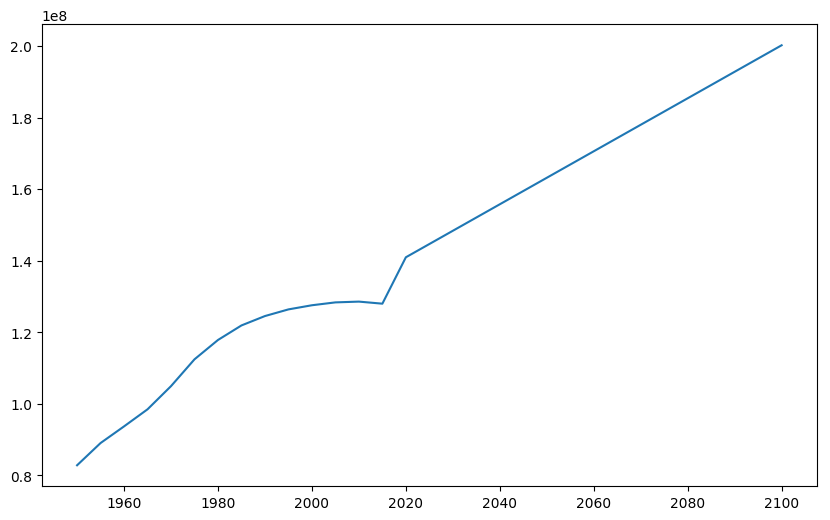

In [135]:
predictPopulation("Japan")